In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from sklearn import datasets, neighbors
from sklearn.inspection import DecisionBoundaryDisplay

# EDA Validierung des Datensatzes

In [2]:
diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes.shape

(768, 9)

In [8]:
diabetes.duplicated().sum()

0

In [10]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
diabetes2 = diabetes[diabetes.SkinThickness != 0]
diabetes2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,3.512015,119.822551,71.197782,29.153420,113.282810,32.774122,0.504850,31.558226,0.332717
std,3.324759,32.894640,13.007678,10.476982,122.735833,7.144264,0.346639,10.743768,0.471622
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,22.000000,0.000000,27.800000,0.259000,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,90.000000,32.800000,0.417000,28.000000,0.000000
75%,5.000000,140.000000,80.000000,36.000000,165.000000,36.900000,0.660000,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
diabetes3 = diabetes2[diabetes2.BloodPressure != 0]
diabetes3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,3.497217,119.866419,71.461967,29.163265,113.703154,32.768089,0.504234,31.547310,0.332096
std,3.305045,32.922924,12.284724,10.493017,122.768895,7.148982,0.347078,10.746621,0.471403
min,0.000000,0.000000,24.000000,7.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,97.500000,64.000000,22.000000,0.000000,27.800000,0.259000,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,90.000000,32.800000,0.415000,28.000000,0.000000
75%,5.000000,140.500000,80.000000,36.000000,165.000000,36.900000,0.659000,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
diabetes4 = diabetes3[diabetes3.BMI != 0]
diabetes4.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.510242,119.903166,71.469274,29.186220,113.960894,32.890130,0.501823,31.586592,0.333333
std,3.304281,32.975142,12.302450,10.505807,122.894735,6.875842,0.343643,10.747286,0.471844
min,0.000000,0.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,22.000000,0.000000,27.800000,0.259000,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,90.000000,32.800000,0.415000,28.000000,0.000000
75%,5.000000,141.000000,80.000000,36.000000,165.000000,36.900000,0.658000,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
diabetes5 = diabetes4[diabetes4.Insulin != 0]
diabetes5.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,3.295165,122.315522,70.671756,29.122137,155.717557,33.072519,0.522476,30.839695,0.330789
std,3.209425,31.435992,12.481277,10.513128,118.879630,7.023947,0.345232,10.199903,0.471097
min,0.000000,0.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,28.400000,0.270000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.447000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
diabetes6 = diabetes5[diabetes5.Glucose != 0]
diabetes6.describe()
diabetes6.shape

(392, 9)

## Multivariante Analyse

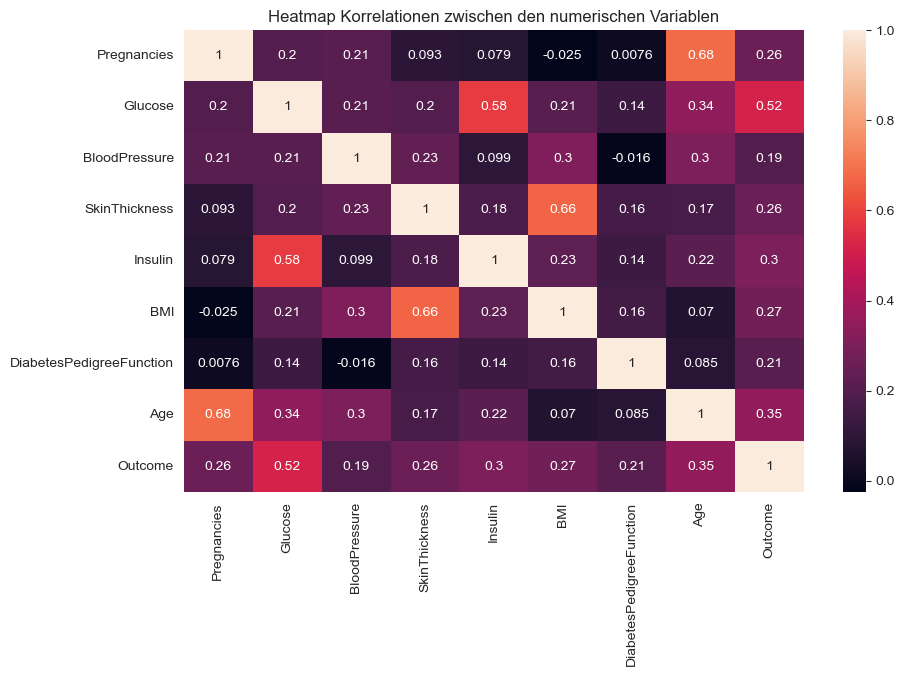

In [28]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(diabetes6.corr(),annot=True,ax=ax)
plt.title("Heatmap Korrelationen zwischen den numerischen Variablen",fontsize=12)
plt.show()

## ZUSAMMEN FASSUNG EDA TODO
- 
- fdg
- dfg
- dg
- 

# Modellierung

### Logistic Regression

In [31]:
x = diabetes6.drop(columns=['Outcome'], axis=1)
y = diabetes6['Outcome']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=43)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Vorhersage für Testdaten
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.7796610169491526


### Evaluation des Models

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,75,9,84
1,17,17,34
All,92,26,118


**Classification Report**

1. Precision (Präzision):
Der Anteil der wahren positiven Vorhersagen unter allen positiven Vorhersagen.
Precision = TP / (TP + FP)

2. Recall (Rückruf):
Der Anteil der wahren positiven Vorhersagen unter allen tatsächlichen positiven Instanzen.
Recall = TP / (TP + FN)

3. F1-Score:
Das harmonische Mittel aus Precision und Recall.
F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

4. Support:
Die Anzahl der tatsächlichen Instanzen für jede Klasse.

5. Accuracy (Genauigkeit):
Der Anteil der korrekten Vorhersagen insgesamt.
Accuracy = (TP + TN) / (TP + TN + FP + FN)

6. Macro AVG (Makro-Durchschnitt):
Der Durchschnitt der Metriken für jede Klasse, ohne dabei die Klassenhäufigkeiten zu berücksichtigen.

7. Weighted AVG (Gewichteter Durchschnitt):
Der gewichtete Durchschnitt der Metriken für jede Klasse, wobei die Klassenhäufigkeiten berücksichtigt werden.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        84
           1       0.65      0.50      0.57        34

    accuracy                           0.78       118
   macro avg       0.73      0.70      0.71       118
weighted avg       0.77      0.78      0.77       118


**AUC-ROC (Area Under the ROC Curve):** Die Fläche unter der ROC-Kurve. Eine AUC von 1,0 bedeutet perfekte Vorhersagen, während eine AUC von 0,5 auf eine zufällige Vorhersage hinweist.

In [37]:
from sklearn.metrics import roc_auc_score
print("ROC Accuracy: {}".format(roc_auc_score(y_test,y_pred_proba)))

ROC Accuracy: 0.8308823529411765


## Random Forrest

In [51]:
model = RandomForestClassifier(n_estimators=20, criterion = 'gini', bootstrap = True, random_state=100)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=100)

In [52]:
y_pred_rf = model.predict(X_test)

In [53]:
cmrf=confusion_matrix(y_test,y_pred_rf)
pd.crosstab(y_test, y_pred_rf, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,72,12,84
1,15,19,34
All,87,31,118


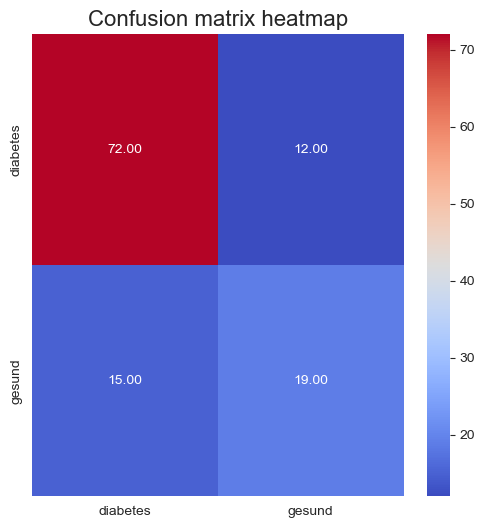

In [54]:
plt.figure(figsize=(6, 6))
x_axis_labels = ['diabetes', 'gesund'] # labels for x-axis
y_axis_labels = ['diabetes', 'gesund'] # labels for y-axis
sns.heatmap(cmrf, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt=".2f", cmap='coolwarm')
plt.title("Confusion matrix heatmap", fontsize=16)
plt.show()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        84
           1       0.61      0.56      0.58        34

    accuracy                           0.77       118
   macro avg       0.72      0.71      0.71       118
weighted avg       0.77      0.77      0.77       118


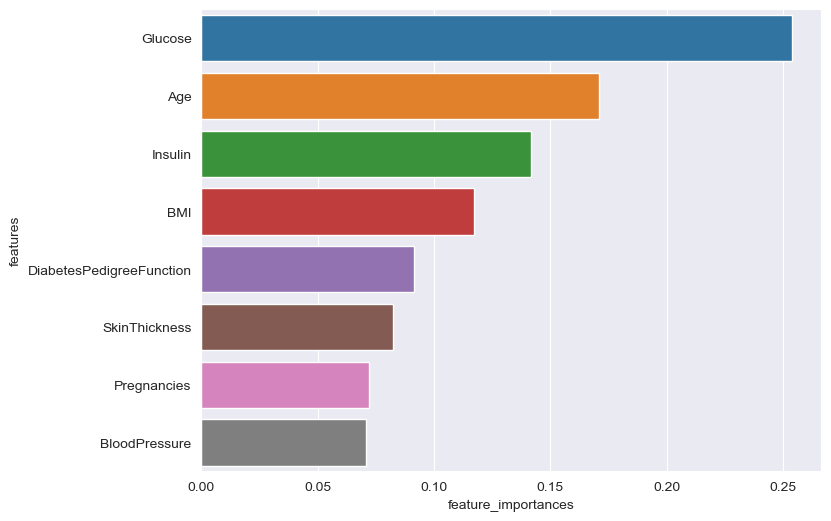

In [56]:
fi_df = pd.DataFrame({
    "feature_importances" : model.feature_importances_,
    "features" : x.columns
})

fi_df.sort_values(by="feature_importances", ascending=False, inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(x="feature_importances", y="features", data=fi_df)
plt.show()

## kNN

In [56]:
cmap_bold = ["darkorange", "c",]
weights = 'distance'
n_neighbors = 5
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(x, y)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cmap_light,
                                       ax=ax, response_method="predict", plot_method="pcolormesh",
                                       xlabel='sepal length (cm)', ylabel='sepal width (cm)',
                                       shading="auto")

sns.scatterplot(x=iris_lr["sepal_length"],
                y=iris_lr["sepal_width"],
                hue=diabetes6['Outcome'],
                palette=cmap_bold,
                alpha=1.0,
                edgecolor="black")
plt.title("2-Klassen Klassifikation (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.show()